In [1]:
import pandas as pd
import numpy as np 

import os, sys 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
predictions_df = pd.read_csv(r'C:\Users\admin\Documents\Review Prompting\task1_rating_prediction\results\predictions.csv')

predictions_df.head()

,prompt1,prompt2,prompt3,actual
0,5,5,5,5
1,5,5,5,5
2,5,5,5,4
3,5,5,5,5
4,5,5,5,5


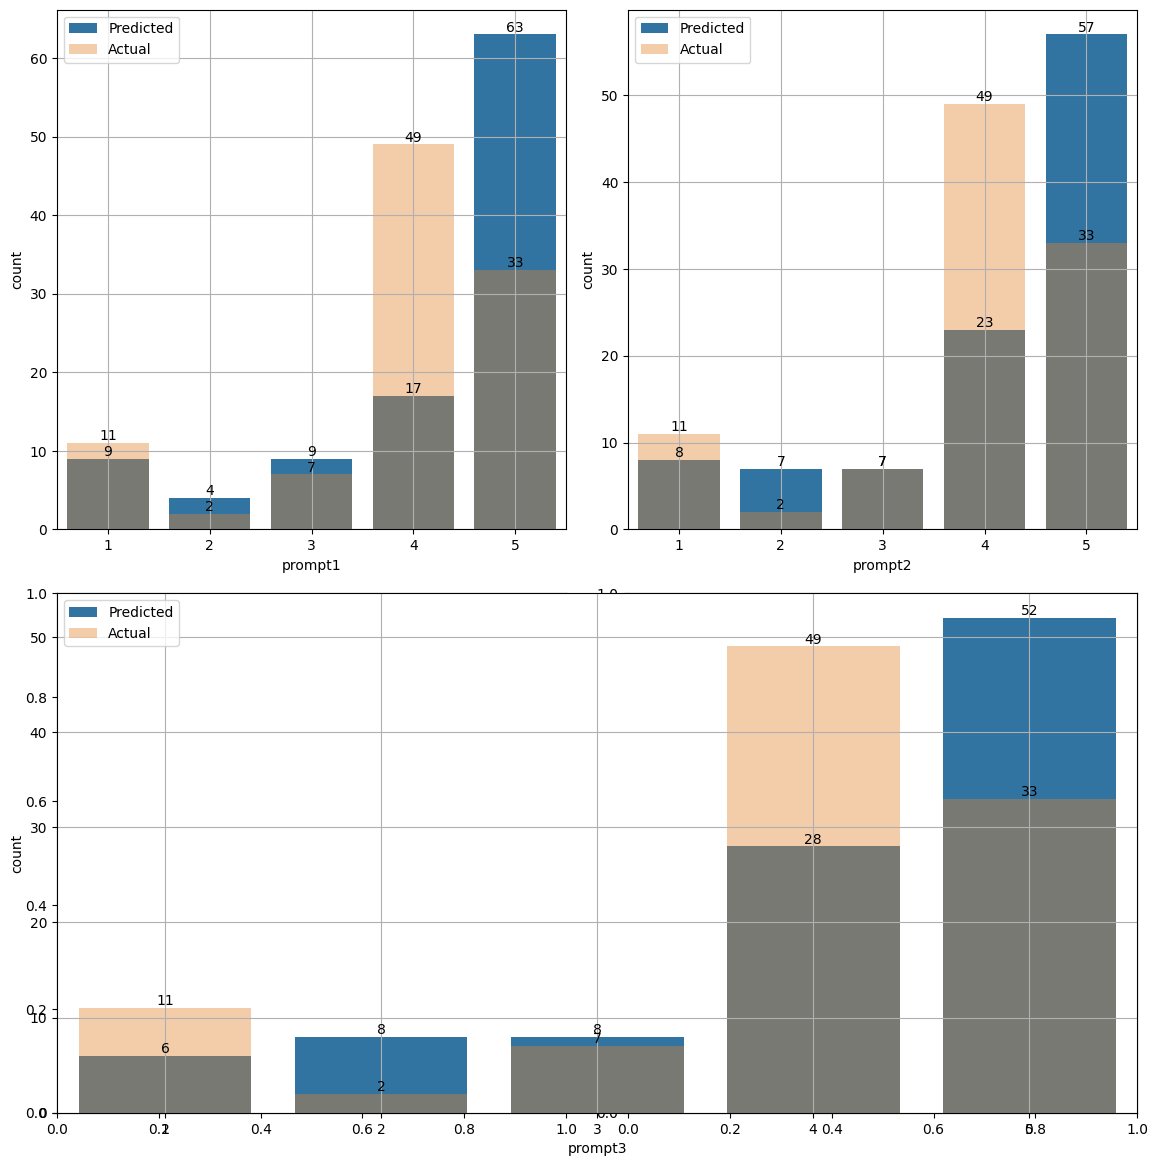

In [28]:
import matplotlib.gridspec as gridspec

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(ax[0, 0])
sns.countplot(data=predictions_df, x='prompt1', ax=ax1)
sns.countplot(data=predictions_df, x='actual', ax=ax1, alpha=0.4)
ax1.legend(['Predicted', 'Actual'])
plt.grid()
for container in ax1.containers:
    ax1.bar_label(container)

ax2 = fig.add_subplot(ax[0, 1])
sns.countplot(data=predictions_df, x='prompt2', ax=ax2)
sns.countplot(data=predictions_df, x='actual', ax=ax2, alpha = 0.4)
ax2.legend(['Predicted', 'Actual'])
plt.grid()
for container in ax2.containers:
    ax2.bar_label(container)

ax3 = fig.add_subplot(gs[1, :2])
sns.countplot(data=predictions_df, x='prompt3', ax=ax3)
sns.countplot(data=predictions_df, x='actual', ax=ax3, alpha = 0.4)
ax3.legend(['Predicted', 'Actual'])
for container in ax3.containers:
    ax3.bar_label(container)

plt.tight_layout()
plt.grid()
plt.show()


In [ ]:
def create_metrics():
    # actual value_counts()
    ac_vc = predictions_df['actual'].value_counts()

    p1_vc = predictions_df['prompt1'].value_counts()
    p2_vc = predictions_df['prompt2'].value_counts()
    p3_vc = predictions_df['prompt3'].value_counts()

    vc_df = pd.DataFrame()
    vc_df['actual'] = ac_vc.sort_index()
    vc_df['prompt1'] = p1_vc.sort_index()
    vc_df['prompt2'] = p2_vc.sort_index()
    vc_df['prompt3'] = p3_vc.sort_index()

    temp_df = vc_df.T
    
    metric_df = pd.DataFrame()
    metric_df['actual-prompt1'] = vc_df['actual'] - vc_df['prompt1']
    metric_df['actual-prompt2'] = vc_df['actual'] - vc_df['prompt2']
    metric_df['actual-prompt3'] = vc_df['actual'] - vc_df['prompt3']
    
    return vc_df.T, metric_df

vc_df, metric_df = create_metrics()
# vc_df.head()
metric_df.head()

,actual-prompt1,actual-prompt2,actual-prompt3
actual,,,
1,2,3,5
2,-2,-5,-6
3,-2,0,-1
4,32,26,21
5,-30,-24,-19


In [35]:
from sklearn.metrics import confusion_matrix

def get_confusion_matrix():
    y_test = predictions_df['actual']
    y_pred1 = predictions_df['prompt1']
    y_pred2 = predictions_df['prompt2']
    y_pred3 = predictions_df['prompt3']
    
    cm1 = pd.DataFrame(confusion_matrix(y_test, y_pred1), columns=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4', 'Predicted 5'],
                index=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4', 'Actual 5'])
    cm2 = pd.DataFrame(confusion_matrix(y_test, y_pred2), columns=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4', 'Predicted 5'],
                index=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4', 'Actual 5'])
    cm3 = pd.DataFrame(confusion_matrix(y_test, y_pred3), columns=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4', 'Predicted 5'],
                index=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4', 'Actual 5'])
    
    return cm1, cm2, cm3

cm1, cm2, cm3 = get_confusion_matrix()

In [37]:
cm1

,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5
Actual 1,7,3,1,0,0
Actual 2,2,0,0,0,0
Actual 3,0,1,4,1,1
Actual 4,0,0,4,16,29
Actual 5,0,0,0,0,33


In [38]:
cm2

,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5
Actual 1,6,5,0,0,0
Actual 2,2,0,0,0,0
Actual 3,0,1,4,1,1
Actual 4,0,1,3,21,24
Actual 5,0,0,0,1,32


In [39]:
cm3

,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5
Actual 1,4,6,1,0,0
Actual 2,2,0,0,0,0
Actual 3,0,2,3,2,0
Actual 4,0,0,4,23,22
Actual 5,0,0,0,3,30


## Explore severe errors absolute(predicted - actual) >= 2

In [ ]:
def explore_severe_errors():
    for i in range(len(predictions_df)):
        actual_value = predictions_df['actual'][i]

        for 